In [2]:
device = 'mps'


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt


In [4]:
train_dataset = torchvision.datasets.QMNIST('data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.QMNIST('data', train=False, download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training with {len(train_dataset)} samples")
print(f"Testing with {len(test_dataset)} samples")


Training with 60000 samples
Testing with 60000 samples


In [24]:
linear_model = nn.Sequential(
    nn.BatchNorm1d(28*28),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.25),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Dropout(0.25),
    nn.Linear(64, 10),
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=1e-3)

stats = {
    'train_loss': [],
    'test_loss': [],
    'test_accuracy': [],
}


In [25]:
print(f"Model has {sum(p.numel() for p in linear_model.parameters()):,} parameters")
print(linear_model)


Model has 220,266 parameters
Sequential(
  (0): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.25, inplace=False)
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): ReLU()
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.25, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
import tqdm as tqdm

for epoch in tqdm.trange(60):
    linear_model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        x = x.view(x.size(0), -1)
        optimizer.zero_grad()
        y_pred = linear_model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        stats['train_loss'].append(loss.item())

    linear_model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            x = x.view(x.size(0), -1)
            y_pred = linear_model(x)
            test_loss += criterion(y_pred, y).item()
            correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= len(test_loader)
    stats['test_loss'].append(test_loss)
    stats['test_accuracy'].append(correct / len(test_dataset))


  3%|▎         | 2/60 [00:26<12:53, 13.34s/it]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(stats['train_loss'])
plt.title('Train loss')

plt.subplot(1, 3, 2)
plt.plot(stats['test_loss'])
plt.title('Test loss')

plt.subplot(1, 3, 3)
plt.plot(stats['test_accuracy'])
plt.title('Test accuracy')

plt.suptitle('0.25 dropout and batch normalization')
plt.show()

print(linear_model)


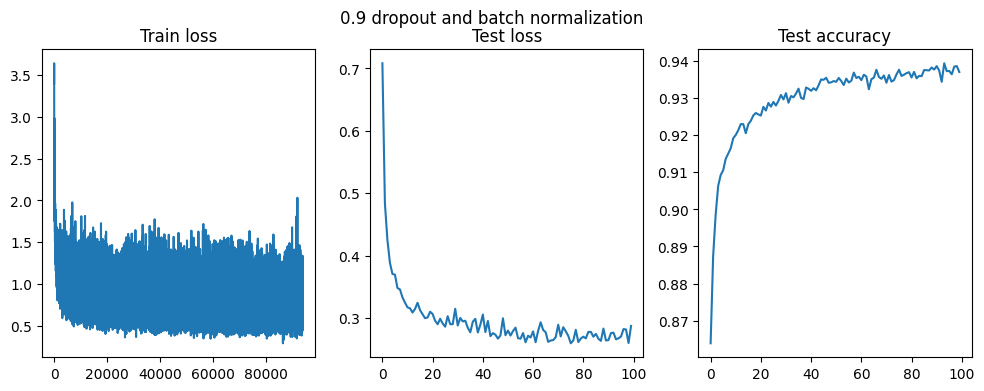

Sequential(
  (0): BatchNorm1d(784, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Dropout(p=0.9, inplace=False)
  (5): Linear(in_features=256, out_features=64, bias=True)
  (6): ReLU()
  (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Dropout(p=0.9, inplace=False)
  (9): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(stats['train_loss'])
plt.title('Train loss')

plt.subplot(1, 3, 2)
plt.plot(stats['test_loss'])
plt.title('Test loss')

plt.subplot(1, 3, 3)
plt.plot(stats['test_accuracy'])
plt.title('Test accuracy')

plt.suptitle('0.9 dropout and batch normalization')
plt.show()

print(linear_model)


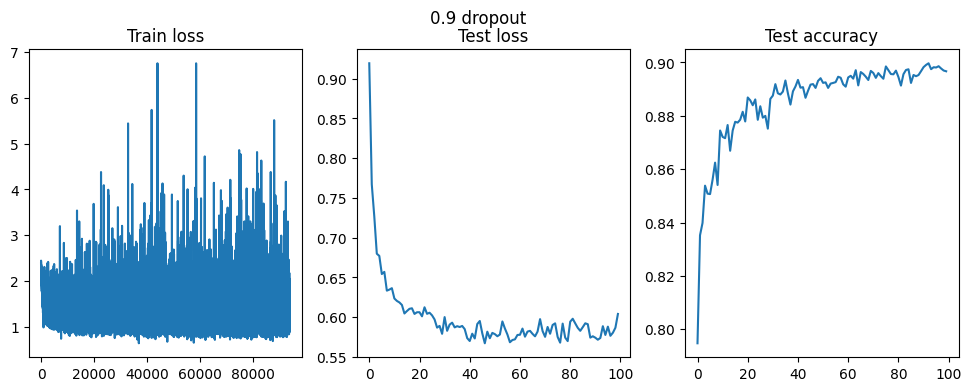

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.9, inplace=False)
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.9, inplace=False)
  (6): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(stats['train_loss'])
plt.title('Train loss')

plt.subplot(1, 3, 2)
plt.plot(stats['test_loss'])
plt.title('Test loss')

plt.subplot(1, 3, 3)
plt.plot(stats['test_accuracy'])
plt.title('Test accuracy')

plt.suptitle('0.9 dropout')
plt.show()

print(linear_model)


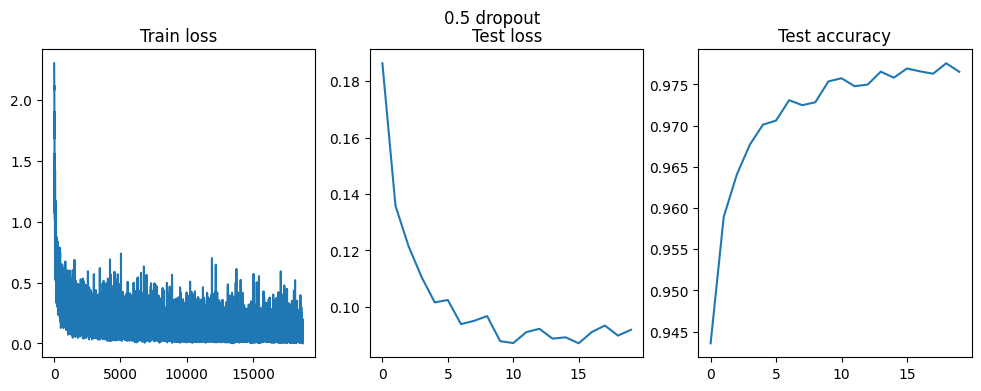

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=64, out_features=10, bias=True)
)


In [51]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(stats['train_loss'])
plt.title('Train loss')

plt.subplot(1, 3, 2)
plt.plot(stats['test_loss'])
plt.title('Test loss')

plt.subplot(1, 3, 3)
plt.plot(stats['test_accuracy'])
plt.title('Test accuracy')

plt.suptitle('0.5 dropout')
plt.show()

print(linear_model)


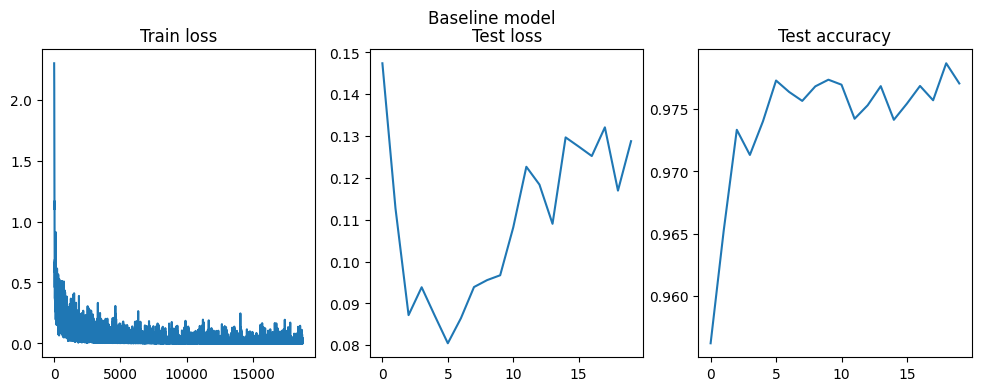

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(stats['train_loss'])
plt.title('Train loss')

plt.subplot(1, 3, 2)
plt.plot(stats['test_loss'])
plt.title('Test loss')

plt.subplot(1, 3, 3)
plt.plot(stats['test_accuracy'])
plt.title('Test accuracy')

plt.suptitle('Baseline model')
plt.show()

print(linear_model)
